<div style="text-align: center;">
    <h1><strong>Physics 129L: Classical Simulation (part1) </strong></h1>
</div>


<div style="text-align: center;">
    <h2><strong>2D Classical Ising model (lattice Ising model) </strong></h2>
</div>

The classical Ising model is a mathematical model used in statistical mechanics to study phase transitions in ferromagnetic materials. It was first proposed by the physicist Ernst Ising in 1925 as a simplified representation of the magnetic behavior of certain materials, such as iron. The Ising model has since become a fundamental tool in statistical mechanics and condensed matter physics.

The Ising model is typically defined on a lattice (or grid), which is a regular arrangement of discrete points in space. In this demonstration, we will be focusing on the 2D model. The structure is given below: 

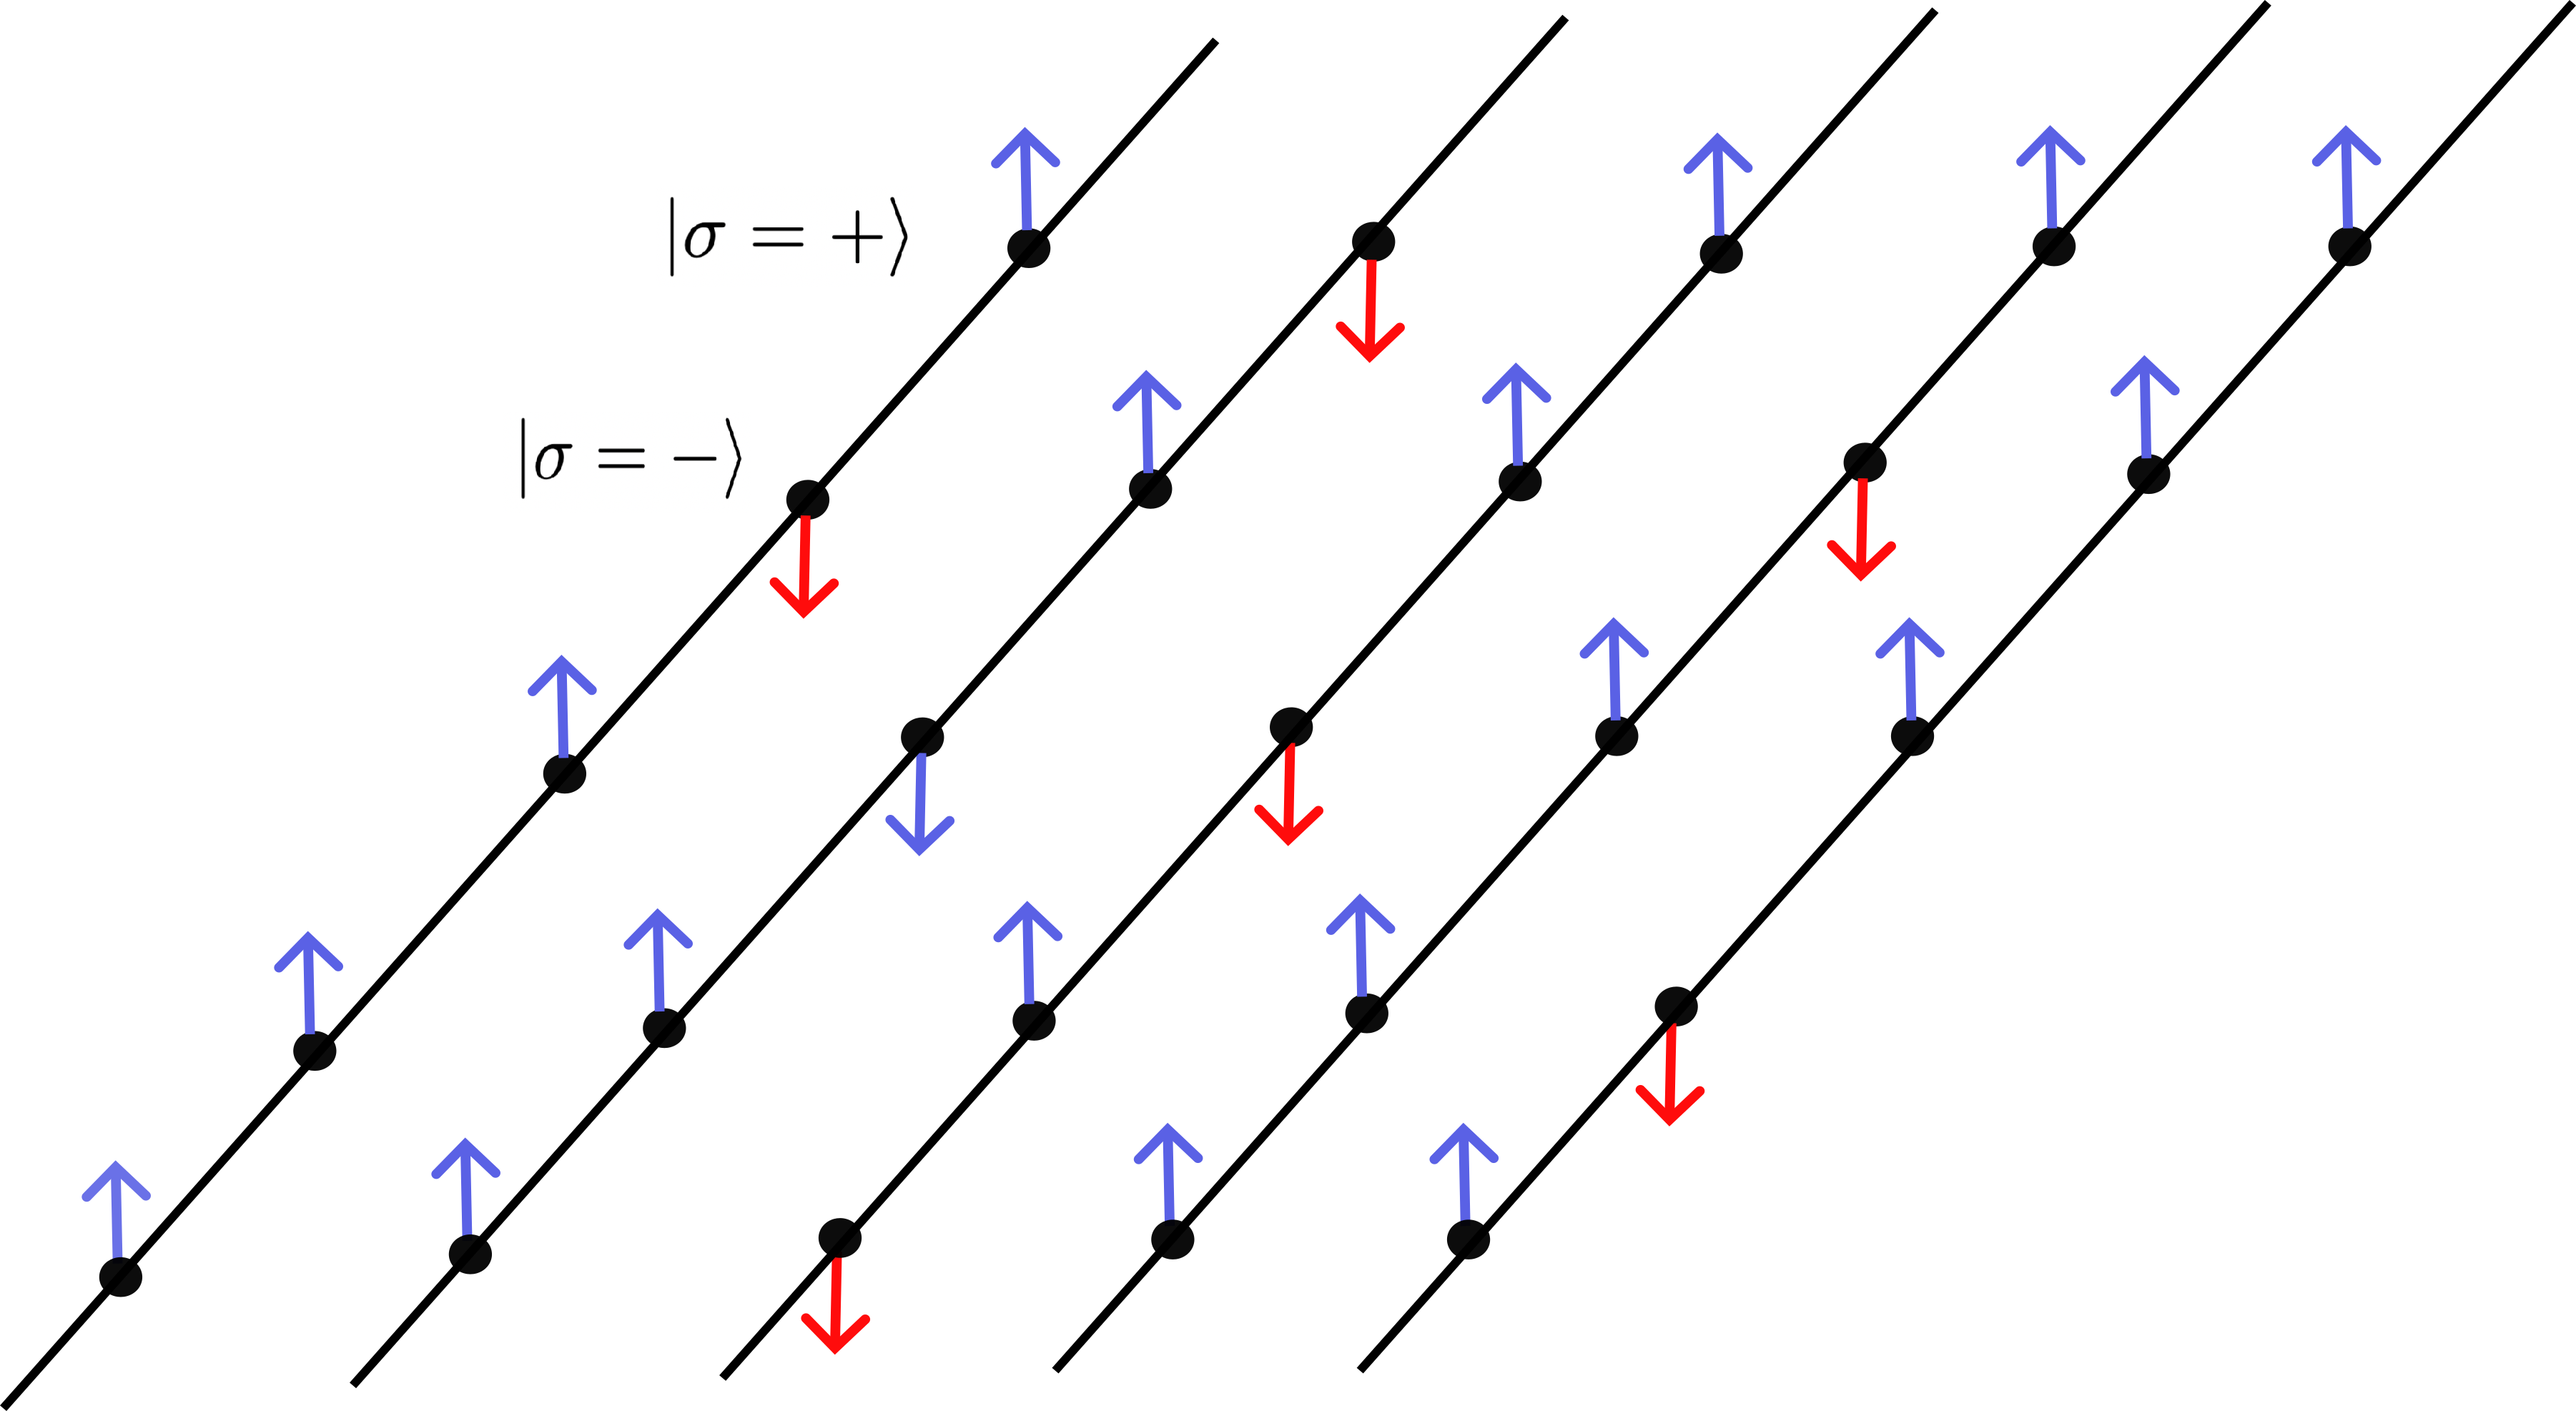



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

<div style="text-align: center;">
    <h3><strong>2D Lattice generation</strong></h3>
</div>

We can treat spins lattice as random variables, denoted as $\{S_{x,y}\}$. Let's define a function to initialize a random spin configuration. When working with a numpy array, we can naturally assign its dimensional index to be its special location, with value -1 or 1. 

In [11]:
def initialize_spins(shape):
    spins = np.random.choice([-1, 1], size=shape)
    return spins

<div style="text-align: center;">
    <h3><strong> Ising Hamiltonian </strong></h3>
</div>

Depending on the arrangement of spins, the Hamiltonian for the classical Ising model is often given by the following expression:

$$H = -J \sum_{\langle i, j \rangle} S_i S_j - B \sum_{i} S_i$$

where $J$ is the coupling constant, representing the strength of the interaction between neighboring spins. $\langle i, j \rangle$ denotes a sum over pairs of nearest-neighbor spins, $S_i$ represents the spins, and B represents an external magnetic field. 

In [12]:
# Variables 
J_value = 2  # coupling constant
B_value = 0 # external magnetic field
L_size =10    # lattice size
beta_value=0.05 # Temperature

In [13]:
# Function to calculate the energy of the system
def net_energy(spins, J, B,print_val=False):
    energy = 0  # initial

    for i in range(spins.shape[0]):
        for j in range(spins.shape[1]):
            # Two neighboring spin coupling
            # Calculate indices of neighboring spins using modulo for periodic boundary conditions
            neighbor_down = spins[(i + 1) % spins.shape[0], j]
            neighbor_right = spins[i, (j + 1) % spins.shape[1]]

            # Interaction terms should be added to the energy
            energy -= J * spins[i, j] * (neighbor_down + neighbor_right)
            # External magnetic field
            energy -= B * spins[i, j]
            if print_val==True:
                
                
                print('*Index**********')
                print(i,j)
                print('*****Energy******')
                print(energy)
                print('**neighbor Index*********')
                print((i + 1) % spins.shape[0], j)
                print(i, (j + 1) % spins.shape[1])
            
 

    return energy

# Function to generate a random spin configuration of size L
def generate_random_spin_configuration(L):
    np.random.seed(42)
    return np.random.choice([-1, 1], size=(L, L))

 

<div style="text-align: center;">
    <h3><strong> Example: </strong></h3>
</div>

In [9]:
spins = generate_random_spin_configuration(L_size)
print(spins)
energy = net_energy(spins,J=J_value,B=B_value)
print(energy)
fig, ax = plt.subplots()
im = ax.imshow(spins, cmap='binary', interpolation='none')
display(fig)


NameError: name 'random' is not defined

<div style="text-align: center;">
    <h3><strong>Statistical description of the Ising model  </strong></h3>
</div>

Let's look at various thermodynamic properties and statistical measures. The fundamential quatity is the partition function, 

$$Z = \sum_{i,j} e^{-\beta H}$$

where $\beta=1/k_B T$. For Ising model, we have,

$$Z=e^{-\beta \left(-J \sum_{\langle i, j \rangle} S_i S_j - B \sum_{i} S_i\right) }.$$

In particular, the joint distribution is a probability mass function (since we are working on a finite system), and it has a form,

$$ P(S)= \frac{1}{Z}e^{-\beta H},$$

where $S=\{S_1,S_2,\cdots,S_L\}$, and each $S$ defines a unique energy. As one can see, it is very hard to draw sample from this multi-variable distribution. It is easy to see that the total number of unique spin configurations exponentially grows with the system's dimension, $2^{L^2}$, , making computations difficult for large system size $L>20$. 



In [14]:
import numpy as np
from itertools import product


def generate_all_configurations(grid_size):
    # Generate all possible spin configurations
    spins = np.array(list(product([-1, 1], repeat=grid_size**2)))

    # Reshape spins to a 2D array for easier manipulation
    configurations = spins.reshape((-1, grid_size, grid_size))

    # Find unique configurations
    unique_configurations = np.unique(configurations, axis=0)

    return unique_configurations



def ising_boltzmann_weight(beta,J, B, spins):
    # J: coupling constant, B: external magnetic field, spins: 2D array representing spin configuration
    
    # Calculate the energy for the given spin configuration
    energy = net_energy(spins,J,B)
     
    # Calculate the Boltzmann weight
    weight = np.exp(-beta * energy)
#     print(energy)
#     print(weight)
    return weight,energy


    

def calculate_partition_function(beta, J, B, grid_size):
    # energy array
    energy_arry=np.zeros(int(2**(grid_size**2)))
    # probability array
    prob_arry=np.zeros(int(2**(grid_size**2)))
    # Generate all unique spin configurations
    unique_configurations = generate_all_configurations(grid_size)

    # Calculate Boltzmann weights for each unique configuration
    for i,config in enumerate(unique_configurations):
#         if i==6: # Example grid plot
#             fig, ax = plt.subplots()
#             im = ax.imshow(config, cmap='binary', interpolation='none')
#             display(fig)
#             print(f"The energy is:\n{energy}")

        weights,energy = ising_boltzmann_weight(beta, J, B, config) 
        energy_arry[i]=energy
        prob_arry[i]=weights

    
    # Calculate the partition function as the sum of Boltzmann weights
    partition_function = np.sum(prob_arry)
    
    
    unique_values, index,counts = np.unique(prob_arry,return_index=True, return_counts=True)
    unique_energy=energy_arry[index]
 
    pdf=counts*unique_values/(partition_function)
    
    return partition_function,unique_energy,pdf




<div style="text-align: center;">
    <h3><strong> Example: </strong></h3>
</div>

In [51]:
# Record the start time
start_time = time.time()
Z, energy_arry,pdf= calculate_partition_function(beta_value, J_value, B_value, L_size)
# Record the end time
end_time = time.time()

print(f"The partition function Z for the Ising model is: {Z}")
print(pdf)
print(energy_arry)


# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

# fig, ax = plt.subplots(figsize=(8, 6))
# # Generate a list of colors using a colormap
# colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

# # Create a bar plot
# ax.bar(energy_arry, pdf,color= colors)

# # Adding labels and title

# ax.grid(True)
# ax.set_title('Exact Boltzmann Distribution of Configurations for Ising Model')

# plt.show()

The partition function Z for the Ising model is: 43180521.331920676
[2.84790584e-06 2.54570562e-05 2.12340219e-04 1.20316844e-03
 5.84875478e-03 2.25405651e-02 6.70627521e-02 1.40572363e-01
 2.10215642e-01 2.20706644e-01 1.69722482e-01 9.53120138e-02
 4.36835874e-02 1.55709909e-02 5.08235943e-03 1.46057954e-03
 5.89837368e-04 1.03521642e-04 7.72180708e-05 6.87407908e-06]
[  60.   52.   44.   36.   28.   20.   12.    4.   -4.  -12.  -20.  -28.
  -36.  -44.  -52.  -60.  -68.  -76.  -84. -100.]
Elapsed Time: 701.4607 seconds


<div style="text-align: center;">
    <h3><strong> Gibbs Sampler on Ising model  </strong></h3>
</div>

Calculating the exact partition function and obtaining the exact boltzmann weight for a spin configuration becomes hard as we increase the system size. Let's consider a conditional distribution function: a variable $S_i$ given the rest spins,  

$$P(S_{i}|S_{\rm rest})=\frac{e^{\beta \left(-2J S_i \sum_{\langle j \rangle}  S_j - B \sum_{j} S_j-B S_i\right) }}{1+e^{\beta \left(-2J S_i \sum_{\langle j \rangle}  S_j - B \sum_{j} S_j-B S_i\right) }}$$

A Gibbs sampling process involves drawing a sample from the distribution of that variable while fixing the values of all other variables.

In [15]:
# Gibbs Update
import numpy as np

def Gibbs_sampler(spins, spin_index_x, spin_index_y, beta, J, B, grid_size):
    # Initialize energy to zero
    energy = 0

    # Two neighboring spin coupling
    # Calculate indices of neighboring spins using modulo for periodic boundary conditions
    neighbor_down = spins[(spin_index_x + 1) % grid_size, spin_index_y]
    neighbor_right = spins[spin_index_x, (spin_index_y + 1) % grid_size]
    
    neighbor_up = spins[(spin_index_x - 1) % grid_size, spin_index_y]
    neighbor_left = spins[spin_index_x, (spin_index_y - 1) % grid_size]

    
    # Interaction terms should be added to the energy
    energy -= J * spins[spin_index_x, spin_index_y] * (neighbor_down + neighbor_right+neighbor_up+neighbor_left)
    # External magnetic field
    energy -= B * spins[spin_index_x, spin_index_y]
    
    # Calculate the weight factor using the Boltzmann factor
    weight_factor = np.exp(-2*beta * energy)
    
    # Calculate the conditional probability
    prob = weight_factor / (1 + weight_factor)
    
    # Generate a uniform random number between 0 and 1
    
    uniform_num = np.random.rand()

    # Update the spin value based on the conditional probability
    if uniform_num <= prob:
        new_spin_val = spins[spin_index_x, spin_index_y]
    else:
        new_spin_val = -spins[spin_index_x, spin_index_y]
    
    # Return the calculated energy, conditional probability, and the new spin value
    return energy, prob, new_spin_val

# spin_index_x=0
# spin_index_y=0

# # Example Spin 
# spins = generate_random_spin_configuration(L_size)
# print(spins)

# energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x,spin_index_y, beta=beta_value,J=J_value, B=B_value,grid_size=L_size)
# print(new_spin_val_c)
# print(prob_c)

<div style="text-align: center;">
    <h3><strong> Sampler Stepping </strong></h3>
</div>

For each variable in the distribution, sample a new value from its conditional distribution given the current values of all other variables (e.g. in our case, for each spin site).


In [24]:
# Function to perform a Gibbs stepping
import os
current_directory = os.getcwd()
def Gibbs_step(spins_init, beta, J, B, grid_size,burnin_=13000,sample_size=5000):
    spins=spins_init
    burnin_step=0
    s=0
    sample_gibbs_energy=[]
    while burnin_step<=burnin_:
        for i in range(grid_size):
            for j in range(grid_size):
                energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                spins[i,j]=new_spin_val_c
        burnin_step+=1
        # Get the current working directory

        # Specify the file path relative to the current working directory
        current_file_name='example/'+str(burnin_step)+'.png'
        file_path = os.path.join(current_directory, current_file_name)
        fig, ax = plt.subplots()
        ax.imshow(spins)
        plt.savefig(file_path)
        plt.close()
    
    while s<sample_size:
        for i in range(grid_size):
            for j in range(grid_size):
                energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                spins[i,j]=new_spin_val_c
     
        weights,energy = ising_boltzmann_weight(beta, J, B, spins) 
        sample_gibbs_energy.append(energy)
                #spins[i,j]=new_spin_val_c
        s+=1
    return sample_gibbs_energy





<div style="text-align: center;">
    <h3><strong> Example: </strong></h3>
</div>

In [40]:

# Record the start time
start_time = time.time()


spins = generate_random_spin_configuration(L_size)
print(spins)

beta_value=1
B_value=0

energy_arry_MC=Gibbs_step(spins_init=spins,beta=beta_value,J=J_value, B=B_value,grid_size=L_size,burnin_=200,sample_size=5)

#For compare results 
    
    
# net_size=len(energy_arry_MC)
# energy_arry_MC, count_MC = np.unique(energy_arry_MC, return_counts=True)

# pdf_MC=count_MC/net_size

# pdf_MC_full=np.zeros(len(pdf))
# for i in range(0,len(energy_arry_MC)):
#     indices = np.where(energy_arry_MC[i]==energy_arry)[0]
#     pdf_MC_full[indices]=pdf_MC[i]

# # Record the end time
# end_time = time.time()

 
# # Calculate the elapsed time
# elapsed_time = end_time - start_time

# # Print the elapsed time
# print(f"Elapsed Time: {elapsed_time:.4f} seconds")




# # Create a subplot with 1 row and 3 columns, specifying the width ratios
# fig = plt.figure(figsize=(10, 10))
# gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# num_bars = len(pdf_MC_full)

# # Generate a list of colors using a colormap
# colors = plt.cm.viridis(np.linspace(0, 1, num_bars))


# # First subplot (1 row, 3 columns, first plot)
# ax1 = fig.add_subplot(gs[0])
# ax1.bar(energy_arry, pdf_MC_full,color= colors)

# ax1.set_xlabel('Energy')
# ax1.set_ylabel('Probability')
# ax1.grid(True)
# ax1.set_title('Simulated Boltzmann Distribution for Ising Model')


# # Second subplot (1 row, 3 columns, second plot)
# ax2 = fig.add_subplot(gs[1])
# ax2.bar(energy_arry, pdf ,color= colors)
# ax2.set_xlabel('Energy')
# ax2.set_ylabel('Probability')
# ax2.grid(True)
# ax2.set_title('Exact Boltzmann Distribution for Ising Model')

# # Third subplot (1 row, 3 columns, third plot - elongated)
# ax3 = fig.add_subplot(gs[1, :])
# ax3.bar(energy_arry, np.abs(pdf_MC_full-pdf),color= colors )
# ax3.set_xlabel('Energy')
# ax3.set_ylabel('Probability (percent difference)')
# ax3.grid(True)
# ax3.set_title(' Simulated v.s. Exact')



[[-1  1 -1 -1 -1  1 -1 -1 -1  1]
 [-1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1 -1  1 -1 -1 -1]
 [-1 -1  1  1  1  1  1 -1  1  1]
 [-1  1 -1  1 -1  1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1  1 -1  1  1]
 [ 1  1 -1  1 -1  1  1  1 -1  1]
 [-1  1 -1  1 -1 -1  1 -1  1  1]
 [ 1  1  1  1  1  1  1  1  1 -1]]


/var/folders/5l/k1j0w9fn4vq02tg0rrsshhqh0000gn/T/ipykernel_49416/1666083563.py:26: RuntimeWarning: overflow encountered in exp
  weight = np.exp(-beta * energy)


In [41]:
import cv2
import os

# Set the path to the directory containing PNG files
png_directory = current_directory+'/example/'

# Set the output video file name
output_video_path = "output_video.mp4"

# Get the list of PNG files in the directory
png_files = [f for f in os.listdir(png_directory) if f.endswith('.png')]

# Sort the files based on their numeric names
png_files.sort(key=lambda x: int(x.split('.')[0]))

# Set video codec and other parameters
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 10  # Adjust the frames per second as needed

# Get the dimensions of the first image (assuming all images have the same dimensions)
first_image_path = os.path.join(png_directory, png_files[0])
first_image = cv2.imread(first_image_path)
height, width, _ = first_image.shape

# Create the video writer object
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Iterate through PNG files and write frames to the video
for png_file in png_files:
    png_path = os.path.join(png_directory, png_file)
    frame = cv2.imread(png_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

print(f"Video created and saved to: {output_video_path}")


Video created and saved to: output_video.mp4


<div style="text-align: center;">
    <h3><strong> magnetization, Landau theory, and phase transition of the Ising model  </strong></h3>
</div>

Magnetization is a measure of the average magnetic moment per spin in a given direction. In the context of the Ising model, the magnetic moment is represented by the sum of the spins. The **magnetization** M is defined as: 

$$M = \frac{1}{N} \sum_{i} S_i$$

where $N={L^2}$ is the total number of spins. In the absence of an external magnetic field (B=0), the Ising model exhibits a spontaneous magnetization at low temperatures, where most spins tend to align in the same direction. In the Ising model, the magnetization serves as an order parameter that indicates the presence of a magnetic order in the system. The order parameter is often used to characterize the different phases of the model, especially in the study of phase transitions.


**Landau theory**, in the context of phase transitions, is a phenomenological approach that describes the free energy of a system near a critical point. It provides a framework for understanding the symmetry-breaking mechanisms and the emergence of order parameters. When near a second-order phase transition, the **Landau free energy** can often be written as a Taylor expansion in terms of an order parameter, typically the magnetization 

$$F = F_0 + a (T - T_c) M^2 + b M^4 + \ldots$$

where $F_0$ is the free energy at the critical temperature ($T_c$), a and b are phenomenological coefficients, T is the temperature. 

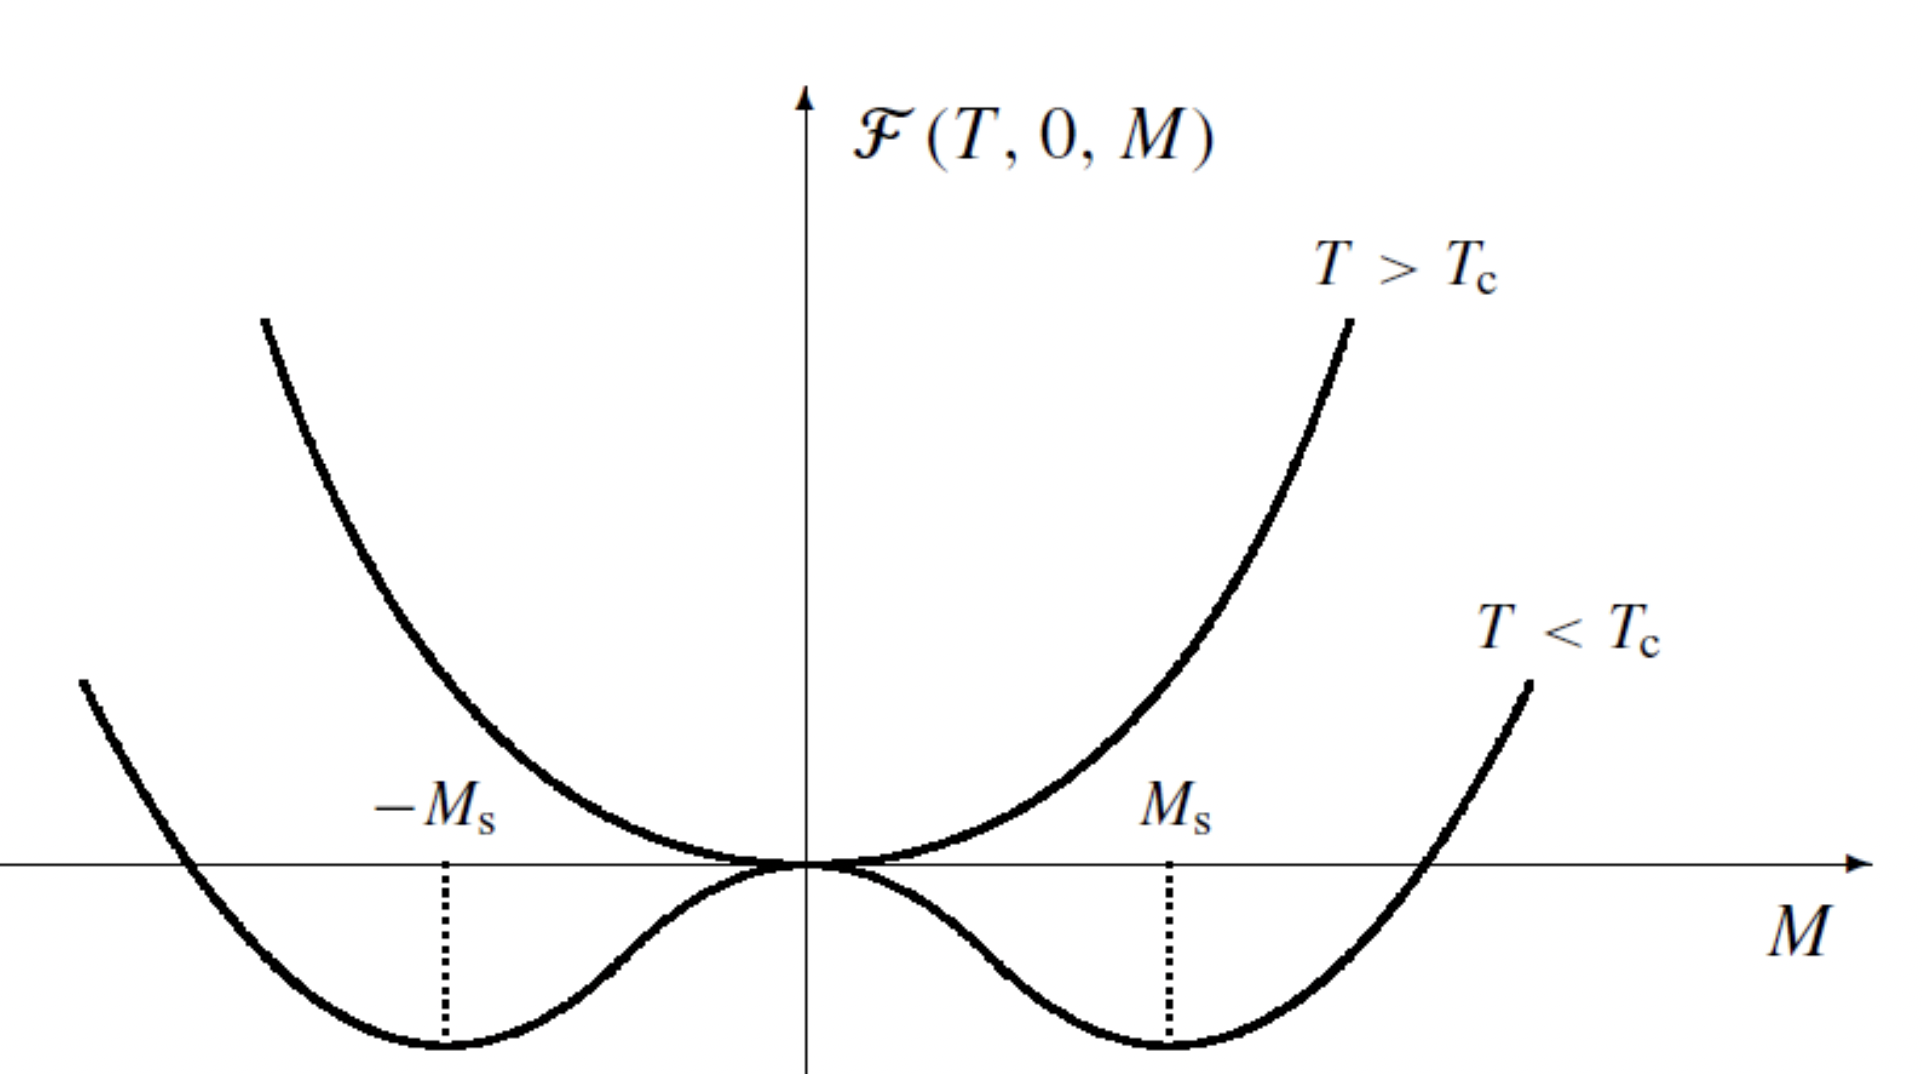

<div style="text-align: center;">
    <h3><strong> Example: magnetization at different temperature </strong></h3>
</div>


-279.5400000000005
86.38000000000038
631.9400000000003
365.2599999999956
6575.319999999883
8080.59999999959
8338.83999999944
8487.959999999355
8597.719999999284
8680.81999999924


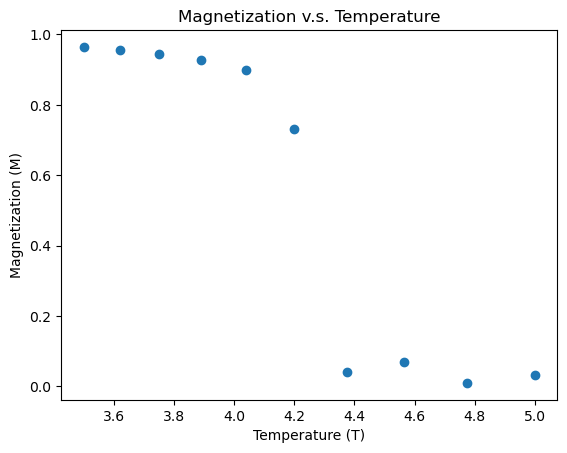

In [20]:
# Function to perform a Gibbs stepping with magnetization
def Gibbs_step_with_M(spins_init, beta_arry, J, B, grid_size,burnin_=13000,sample_size=5000):
    sample_M=[]
    for f in range(0,len(beta_arry)):
        beta=beta_arry[f]
        spins=spins_init
        burnin_step=0
        s=0
        M=0
        
        while burnin_step<=burnin_:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c
            burnin_step+=1

        while s<sample_size:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c

            M+=np.sum(spins)/(grid_size**2)
            
            s+=1
        print(M)
        sample_M.append(M/sample_size)
        
    return sample_M

beta_arry=np.linspace(0.2,1/3.5,10)

T_array=1/beta_arry

spins = generate_random_spin_configuration(L_size)
sample_M=energy_arry_MC=Gibbs_step_with_M(spins_init=spins,beta_arry=beta_arry,J=J_value, B=B_value,grid_size=L_size,burnin_=5300,sample_size=500)
# Create scatter plot
plt.scatter(T_array, np.abs(sample_M), color='tab:blue', marker='o' )

# Add labels and title
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (M)')
plt.title('Magnetization v.s. Temperature')


# Show the plot
plt.show()
    



<div style="text-align: center;">
    <h3><strong> MC convergence and lattice size </strong></h3>
</div>
Let's look at the MC convergence at different lattice size. 

-12.900000000000013
7.999999999999996
-26.42000000000002
382.0199999999998
459.35999999999916
478.79999999999984
486.6800000000002
493.56000000000057
496.74000000000063
497.6800000000004
498.5000000000003
499.18000000000023
499.42000000000024
499.72000000000014
499.7800000000001
499.8
499.94000000000005
499.90000000000003
499.98
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
3.9307958477508644
4.2006920415225055
-17.757785467127984
-345.51557093425635
-450.9826989619379
-476.98961937716325
-488.844290657439
-493.70242214532846
-496.29757785467075
-497.9792387543253
-498.60207612456776
-499.3910034602079
-499.6055363321802
-499.70242214532885
-499.8339100346022
-499.86159169550183
-499.96539792387546
-500.0
-499.99307958477505
-499.99307958477505
-500.0
-499.9792387543253
-499.9861591695502
-500.0
-499.99307958477505
-500.0
-500.0
-500.0
-500.0
-500.0
3.801600000000002
12.870399999999986
6.022399999999997
-70.29120000000003
-455.0464
-479.0143999999999
-488.3199999999

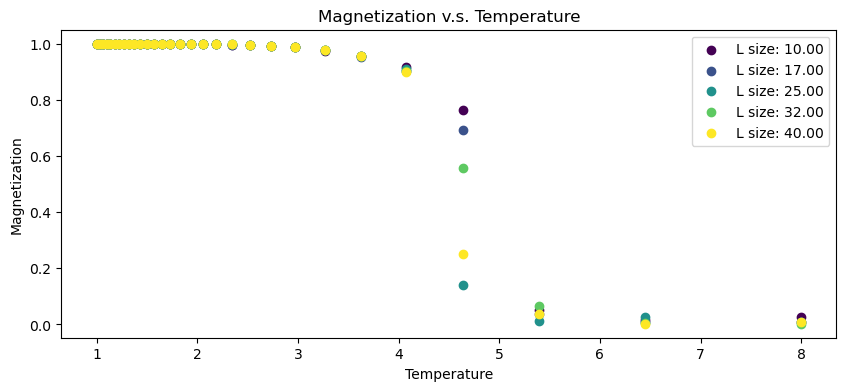

In [40]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

L_arry=np.linspace(10,40,5)
# Generate a list of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(L_arry)))

for g in range(0,len(L_arry)):
    L_size =int(L_arry[g])    # lattice size

    beta_arry=np.linspace(1/8,1/1,30)

    T_array=1/beta_arry

    spins = generate_random_spin_configuration(L_size)
    sample_M=Gibbs_step_with_M(spins_init=spins,beta_arry=beta_arry,J=J_value, B=B_value,grid_size=L_size,burnin_=5300,sample_size=500)
    # Create scatter plot
    axs.scatter(T_array, np.abs(sample_M), color=colors[g], marker='o', label=f'L size: {L_size:.2f}')
axs.axvline(x=Tc, color='tab:red', linestyle='--', label=f'Critical Temperature (Tc): {Tc:.2f}')


# Add labels and title
axs.set_xlabel('Temperature')
axs.set_ylabel('Magnetization')
axs.set_title('Magnetization v.s. Temperature')
axs.legend()

# Show the plot
plt.show()

<div style="text-align: center;">
    <h3><strong> The critical temperature </strong></h3>
</div>

In 2D Ising model, the critical temperature can be calculated via the following,

$$ T_C=\frac{2J}{\log(1+\sqrt{2})}. $$

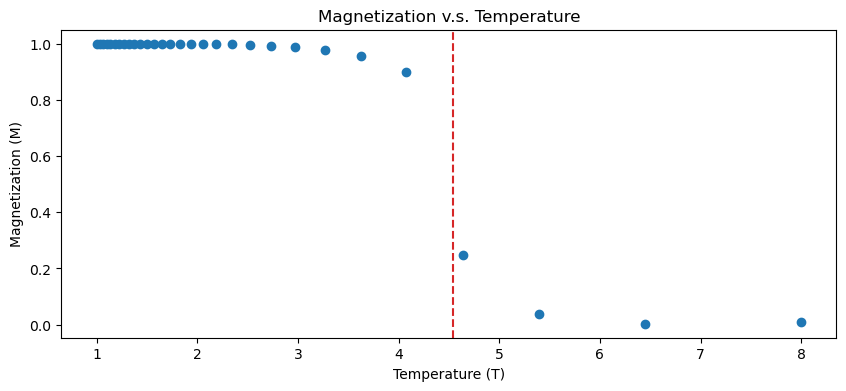

In [42]:
# Define the power-law function
Tc=2*J_value/(np.log(1+np.sqrt(2)))
 
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

plt.scatter(T_array, np.abs(sample_M), color='tab:blue', marker='o' )

# Add labels and title
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (M)')
plt.title('Magnetization v.s. Temperature')

# Show the plot
plt.show()
    





<div style="text-align: center;">
    <h3><strong> Magnetic Field dependence: magnetization of the 2D Ising model </strong></h3>
</div>
Let's look at the MC convergence at different lattice size. 

In [13]:
# Function to perform a Gibbs stepping with magnetization
def Gibbs_step_with_M_vary_B(spins_init, beta, J, B_array, grid_size,burnin_=13000,sample_size=5000):
    sample_M=[]
    for f in range(0,len(B_array)):
        B=B_array[f]
        spins=spins_init
        burnin_step=0
        s=0
        M=0
        
        while burnin_step<=burnin_:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c
            burnin_step+=1

        while s<sample_size:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c

            M+=np.sum(spins)/(grid_size**2)
            
            s+=1
        print(M)
        sample_M.append(M/sample_size)
        
    return sample_M

    

<div style="text-align: center;">
    <h3><strong> Example </strong></h3>
</div>

In [ ]:

B_arry=np.linspace(-50,50,100)

beta_value=0.05 # Temperature
L_size =5

spins = generate_random_spin_configuration(L_size)
sample_M=energy_arry_MC=Gibbs_step_with_M_vary_B(spins_init=spins,beta=beta_value,J=J_value, B_array=B_arry,grid_size=L_size,burnin_=5300,sample_size=500)
# Create scatter plot
plt.scatter(B_arry, np.sign(B_arry)*np.abs(sample_M), color='tab:blue', marker='o' )

# Add labels and title
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (M)')
plt.title('Magnetization v.s. Temperature')


# Show the plot
plt.show()

<div style="text-align: center;">
    <h3><strong> MC convergence and lattice size </strong></h3>
</div>
Let's look at the MC convergence at different lattice size. 

-496.58000000000055
-496.8200000000003
-495.7800000000008
-496.2400000000004
-495.26000000000056
-495.6000000000006
-494.28000000000077
-493.78000000000065
-493.3000000000001
-493.0000000000005
-492.0000000000002
-490.5200000000005
-490.00000000000085
-488.6600000000001
-487.56000000000006
-486.3600000000003
-484.9199999999998
-483.0200000000001
-480.23999999999955
-477.8599999999993
-475.81999999999937
-475.6999999999993
-471.1599999999994
-468.9399999999992
-465.47999999999973
-460.81999999999914
-457.5199999999993
-451.71999999999923
-446.2599999999994
-442.05999999999966
-434.95999999999907
-424.779999999999
-417.91999999999933
-407.4399999999996
-395.86
-387.97999999999985
-371.9199999999999
-362.62000000000035
-341.6800000000004
-323.12000000000006
-309.0600000000001
-284.73999999999984
-259.1599999999998
-235.32000000000002
-201.9
-166.22000000000006
-134.96000000000004
-91.38000000000004
-56.86000000000005
-19.279999999999987
22.59999999999998
62.81999999999987
92.3400000000000

417.8812499999998
426.1062500000005
433.7075000000003
440.1974999999997
446.17375000000067
451.75875000000036
456.28374999999966
460.8849999999997
464.63625000000013
468.21999999999974
471.47375000000017
474.28875000000033
476.78875
479.16375000000005
481.04624999999925
482.64000000000004
484.4950000000005
486.00500000000045
487.490000000001
488.7012500000002
489.65750000000014
490.8775000000003
491.5862499999998
492.42125
493.1987500000005
493.84750000000025
494.48250000000036
494.98749999999956
495.5812499999992
495.8987499999996
496.3812499999988
496.6562499999991
497.0312499999987


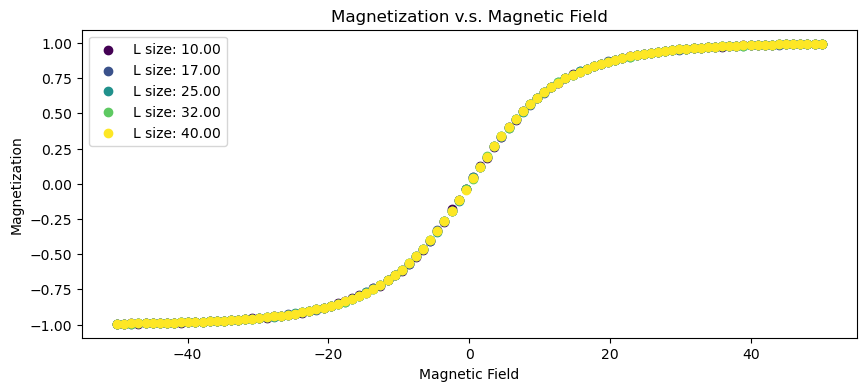

In [54]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

L_arry=np.linspace(10,40,5)
# Generate a list of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(L_arry)))

for g in range(0,len(L_arry)):
    L_size =int(L_arry[g])    # lattice size

    B_arry=np.linspace(-50,50,100)

    spins = generate_random_spin_configuration(L_size)
    # Create scatter plot

    sample_M=Gibbs_step_with_M_vary_B(spins_init=spins,beta=beta_value,J=J_value, B_array=B_arry,grid_size=L_size,burnin_=5300,sample_size=500)
    axs.scatter(B_arry, np.sign(B_arry)*np.abs(sample_M), color=colors[g], marker='o', label=f'L size: {L_size:.2f}' )

# Add labels and title
axs.set_xlabel('Magnetic Field')
axs.set_ylabel('Magnetization')
axs.set_title('Magnetization v.s. Magnetic Field')
axs.legend()

# Show the plot
plt.show()

<div style="text-align: center;">
    <h3><strong> Specific Heat of the 2D Ising model </strong></h3>
</div>

The specific heat ($C_v$) measures the amount of heat energy required to change the temperature of a substance by a unit temperature. It can be related to the variance of the energy in the 2D Ising model, e.g., 

$$C_v = \frac{\beta^2}{N } \left( \langle E^2 \rangle - \langle E \rangle^2 \right),
$$

where $N$ is the total number of spins. 



-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-499.92
0.012862426611789778
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-500.0
0.0
---------
-499.92
0.010725045323324679
---------
-499.92
0.010540361

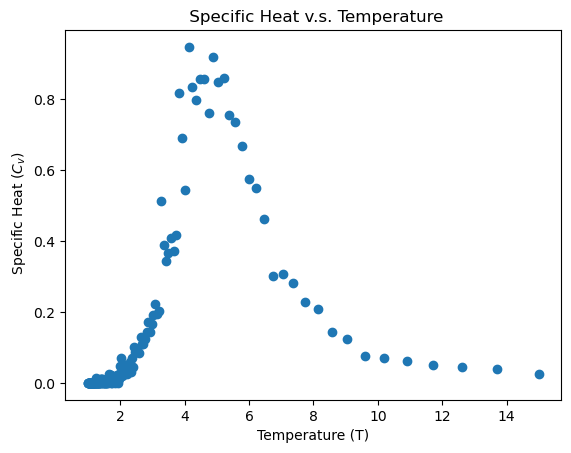

In [15]:
# Function to perform a Gibbs stepping with magnetization
def Gibbs_step_with_E(spins_init, beta_arry, J, B, grid_size,burnin_=13000,sample_size=5000):
    sample_M=[]
    sample_C=[]
    for f in range(0,len(beta_arry)):
        beta=beta_arry[f]
        spins=spins_init
        burnin_step=0
        s=0
        M=0
        E=0 #define average energy 
        E_square=0
        while burnin_step<=burnin_:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c
            burnin_step+=1

        while s<sample_size:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c

            M+=np.sum(spins)/(grid_size**2)
            
            s+=1
            current_delta_E=net_energy(spins, J, B,print_val=False)
            E+=np.abs(current_delta_E) 
            E_square+=current_delta_E**2
        print(M)
        sample_M.append(M/sample_size)
        
        E_2=(E/sample_size)**2
        E2=E_square/sample_size
        
        C=(1/grid_size**2)*beta**2*(E2-E_2)
        sample_C.append(C)
        print(C)
        print('---------')

 
    return sample_C




<div style="text-align: center;">
    <h3><strong> Example </strong></h3>
</div>

In [ ]:

beta_arry=np.linspace(1/1,1/15,150)

T_array=1/beta_arry
L_size =5

spins = generate_random_spin_configuration(L_size)
sample_C=Gibbs_step_with_E(spins_init=spins,beta_arry=beta_arry,J=J_value, B=B_value,grid_size=L_size,burnin_=5300,sample_size=500)
# Create scatter plot
plt.scatter(T_array, (sample_C), color='tab:blue', marker='o' )

# Add labels and title
plt.xlabel('Temperature (T)')
plt.ylabel(' Specific Heat ($C_v$)')
plt.title(' Specific Heat v.s. Temperature')


# Show the plot
plt.show()
    

<div style="text-align: center;">
    <h3><strong> Magnetic Susceptibility of the 2D Ising model </strong></h3>
</div>


Similarly, the magnetic susceptibility quantifies the material's ability to become magnetized per unit change in the external magnetic field strength,

$$\chi = \frac{\beta}{N} \left( \langle M^2 \rangle - \langle M \rangle^2 \right).
$$

In [48]:
# Function to perform a Gibbs stepping with magnetization
def Gibbs_step_with_MS(spins_init, beta_arry, J, B, grid_size,burnin_=13000,sample_size=5000):
    sample_M=[]
    sample_Chi=[]
    for f in range(0,len(beta_arry)):
        beta=beta_arry[f]
        spins=spins_init
        burnin_step=0
        s=0
        M=0
        MS=0 #define average energy 
        MS_square=0
        while burnin_step<=burnin_:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c
            burnin_step+=1

        while s<sample_size:
            for i in range(grid_size):
                for j in range(grid_size):
                    energy_c,prob_c,new_spin_val_c=Gibbs_sampler(spins,spin_index_x=i,spin_index_y=j, beta=beta,J=J, B=B,grid_size=grid_size)
                    spins[i,j]=new_spin_val_c

            M+=np.sum(spins)/(grid_size**2)
            
            s+=1
            
            MS+=np.abs(np.sum(spins) ) 
            MS_square+=((np.sum(spins))**2)
        print(M)
        print(MS)
        print(MS_square)
        sample_M.append(M/sample_size)
        
        MS_2=(MS/sample_size)**2
        MS2=MS_square/sample_size
        
        Chi=1/(grid_size**2)*beta*(MS2-MS_2)
        print(Chi)
        sample_Chi.append(Chi)

        print('---------')

 
    return sample_Chi


<div style="text-align: center;">
    <h3><strong> Example </strong></h3>
</div>

500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
12500
312500
0.0
---------
500.0
1250

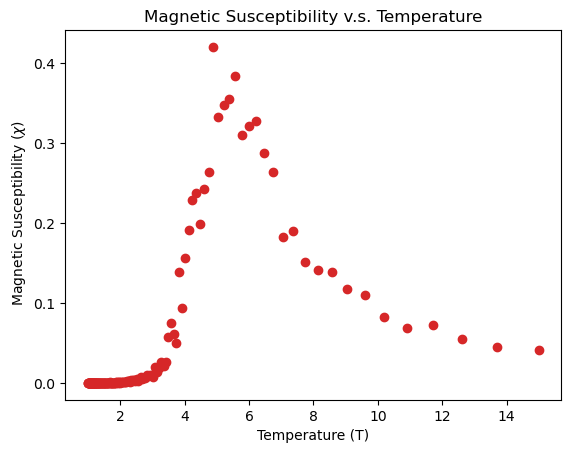

In [50]:

beta_arry=np.linspace(1/1,1/15,150)

T_array=1/beta_arry
L_size =5

spins = generate_random_spin_configuration(L_size)
sample_Chi=Gibbs_step_with_MS(spins_init=spins,beta_arry=beta_arry,J=J_value, B=B_value,grid_size=L_size,burnin_=5300,sample_size=500)
# Create scatter plot
plt.scatter(T_array, (sample_Chi), color='tab:red', marker='o' )

# Add labels and title
plt.xlabel('Temperature (T)')
plt.ylabel(' Magnetic Susceptibility ($\chi$)')
plt.title('Magnetic Susceptibility v.s. Temperature')


# Show the plot
plt.show()